# Normal Distribution: Z-Scores and Percentiles Relationship

## Learning Objectives
By the end of this notebook, you will understand:
- The relationship between z-scores and percentiles in a normal distribution
- How to visualize the standard normal distribution (bell curve)
- How percentiles correspond to specific z-score values
- The practical applications of z-scores and percentiles in statistics
- How to create dual-axis plots for comparing different scales

## Introduction

In [1]:
# Import the required libraries.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.ticker import MultipleLocator
from scipy import stats

print("Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")

Libraries imported successfully!
NumPy version: 1.26.4
Matplotlib version: 3.10.0


## Step 1: Generate the Normal Distribution Data

Let's create the data for our standard normal distribution (mean = 0, standard deviation = 1).

In [2]:
# Define the range of z-scores.
z_scores = np.linspace(-4, 4, 1000)

# Calculate the Gaussian distribution (mean=0, std=1 for normal distribution).
pdf = stats.norm.pdf(z_scores, 0, 1)

print("Normal distribution data generated:")
print(f"Z-score range: {z_scores.min():.1f} to {z_scores.max():.1f}")
print(f"Number of data points: {len(z_scores)}")
print(f"Maximum PDF value: {pdf.max():.4f}")
print(f"PDF at z=0: {stats.norm.pdf(0, 0, 1):.4f}")

Normal distribution data generated:
Z-score range: -4.0 to 4.0
Number of data points: 1000
Maximum PDF value: 0.3989
PDF at z=0: 0.3989


## Step 2: Create the Original Plot with Exact Design

Now let's recreate the exact visualization from the Python script, preserving all the original design elements.

/var/folders/q3/2tkw4wl936l357n57y8sx0x80000gn/T/ipykernel_92618/3677669105.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels([


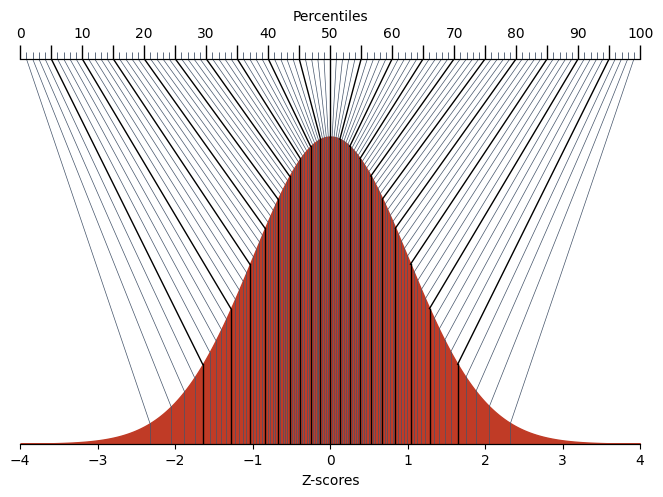

In [3]:

# Create the plot.
fig, ax1 = plt.subplots(figsize=(8, 5))
ax1.margins(y=0)

# Remove the y-axis lines.
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

# Plot and fill the Gaussian curve with color #C03B26 (Red).
ax1.fill_between(z_scores, pdf, color="#C03B26")

# Label the X-axis (z-scores).
ax1.set_xlabel("Z-scores")
ax1.set_xlim(-4, 4)

# Remove Y-axis.
ax1.get_yaxis().set_visible(False)

# Create a new X-axis at the top for the percentiles.
ax2 = ax1.twiny()

# Remove the y-axis lines.
ax2.spines["left"].set_visible(False)
ax2.spines["right"].set_visible(False)

# Define the range of percentiles (0 to 100 without the % sign).
percentiles_for_axis = np.linspace(0, 100, 101)

# Set the tick positions on the top X-axis to align with percentiles.
ax2.set_xticks(np.linspace(0, 100, 101))
ax2.xaxis.set_major_locator(MultipleLocator(5))
ax2.xaxis.set_minor_locator(MultipleLocator(1))
ax2.tick_params(which="major", length=10, width=1)
ax2.tick_params(which="minor", length=5, color="#44546A")

# Set the labels for every fifth percentile and empty labels for others.
ax2.set_xticklabels([
    f"{int(p)}" if int(p) % 10 == 0 else "" for p in np.hstack(
        (0, percentiles_for_axis[::5])
    )
])

# Label the new X-axis (percentiles).
ax2.set_xlabel("Percentiles")
ax2.set_xlim(0, 100)

# Calculate the z-scores for each percentile (1st to 100th percentiles).
percentiles = np.linspace(0, 1, 101)
z_percentiles = stats.norm.ppf(percentiles)

# Draw lines for each percentile from the bottom to the top of the bell curve.
normalized_z = np.linspace(-4, 4, 101)
for index, z in enumerate(z_percentiles):

    # Define the line color and thickness.
    LINE_COLOR = "#000000" if index % 5 == 0 else "#44546A"
    LINE_THICKNESS = 1 if index % 5 == 0 else 0.5

    # Calculate the height of the bell curve at this z-score.
    pdf_value = stats.norm.pdf(z, 0, 1)

    # Draw a line from (z, 0) to (z, pdf_value).
    ax1.plot([z, z], [0, pdf_value],
             color=LINE_COLOR, linewidth=LINE_THICKNESS)

    # Draw a line from (z, pdf_value) to the corresponding z percentiles in the
    # percentile axis.
    ax1.plot([z, normalized_z[index]], [pdf_value, 0.5],
             color=LINE_COLOR, linewidth=LINE_THICKNESS)

# Show the plot.
plt.show()

## Step 3: Understanding the Visualization

Let's examine some key z-score and percentile relationships to better understand what we see in the plot.

In [4]:
# Key z-score and percentile relationships
key_percentiles = [1, 5, 10, 25, 50, 75, 90, 95, 99]

print("KEY Z-SCORE AND PERCENTILE RELATIONSHIPS")
print("=" * 50)
print(f"{'Percentile':<12} {'Z-Score':<10} {'Interpretation'}")
print("-" * 50)

for p in key_percentiles:
    z = stats.norm.ppf(p/100)
    if p == 50:
        interpretation = "Median (center of distribution)"
    elif p < 50:
        interpretation = f"{100-p}% of data is above this value"
    else:
        interpretation = f"{p}% of data is below this value"
    
    print(f"{p:2d}th{'':<7} {z:8.3f}    {interpretation}")

print(f"\nSTANDARD DEVIATIONS AND PERCENTILES:")
print("-" * 40)
for sd in [-3, -2, -1, 0, 1, 2, 3]:
    percentile = stats.norm.cdf(sd) * 100
    print(f"Z = {sd:2d}: {percentile:5.2f}th percentile")

KEY Z-SCORE AND PERCENTILE RELATIONSHIPS
Percentile   Z-Score    Interpretation
--------------------------------------------------
 1th          -2.326    99% of data is above this value
 5th          -1.645    95% of data is above this value
10th          -1.282    90% of data is above this value
25th          -0.674    75% of data is above this value
50th           0.000    Median (center of distribution)
75th           0.674    75% of data is below this value
90th           1.282    90% of data is below this value
95th           1.645    95% of data is below this value
99th           2.326    99% of data is below this value

STANDARD DEVIATIONS AND PERCENTILES:
----------------------------------------
Z = -3:  0.13th percentile
Z = -2:  2.28th percentile
Z = -1: 15.87th percentile
Z =  0: 50.00th percentile
Z =  1: 84.13th percentile
Z =  2: 97.72th percentile
Z =  3: 99.87th percentile


## Step 4: Practical Applications

Let's explore how this relationship is used in real-world scenarios.

In [5]:
# Practical examples
print("PRACTICAL APPLICATIONS OF Z-SCORES AND PERCENTILES")
print("=" * 55)

examples = [
    ("SAT Score Analysis", "SAT score of 1400 (mean=1000, std=200)", 1400, 1000, 200),
    ("Height Analysis", "Height of 180cm (mean=170cm, std=10cm)", 180, 170, 10),
    ("Test Score Analysis", "Test score of 85 (mean=75, std=12)", 85, 75, 12),
    ("Quality Control", "Product weight 52g (target=50g, std=2g)", 52, 50, 2)
]

for name, description, value, mean, std in examples:
    z_score = (value - mean) / std
    percentile = stats.norm.cdf(z_score) * 100
    
    print(f"\n{name}:")
    print(f"  Scenario: {description}")
    print(f"  Z-score: {z_score:.2f}")
    print(f"  Percentile: {percentile:.1f}th")
    
    if percentile > 95:
        status = "Exceptionally high"
    elif percentile > 75:
        status = "Above average"
    elif percentile > 25:
        status = "Average range"
    elif percentile > 5:
        status = "Below average"
    else:
        status = "Exceptionally low"
    
    print(f"  Interpretation: {status}")

print(f"\nEMPIRICAL RULE (68-95-99.7 RULE):")
print("-" * 35)
print("• 68% of data falls within ±1 standard deviation (Z: -1 to +1)")
print("• 95% of data falls within ±2 standard deviations (Z: -2 to +2)")
print("• 99.7% of data falls within ±3 standard deviations (Z: -3 to +3)")

PRACTICAL APPLICATIONS OF Z-SCORES AND PERCENTILES

SAT Score Analysis:
  Scenario: SAT score of 1400 (mean=1000, std=200)
  Z-score: 2.00
  Percentile: 97.7th
  Interpretation: Exceptionally high

Height Analysis:
  Scenario: Height of 180cm (mean=170cm, std=10cm)
  Z-score: 1.00
  Percentile: 84.1th
  Interpretation: Above average

Test Score Analysis:
  Scenario: Test score of 85 (mean=75, std=12)
  Z-score: 0.83
  Percentile: 79.8th
  Interpretation: Above average

Quality Control:
  Scenario: Product weight 52g (target=50g, std=2g)
  Z-score: 1.00
  Percentile: 84.1th
  Interpretation: Above average

EMPIRICAL RULE (68-95-99.7 RULE):
-----------------------------------
• 68% of data falls within ±1 standard deviation (Z: -1 to +1)
• 95% of data falls within ±2 standard deviations (Z: -2 to +2)
• 99.7% of data falls within ±3 standard deviations (Z: -3 to +3)


## Key Takeaways

### Understanding the Visualization
1. **Red Area**: Represents the probability density of the standard normal distribution
2. **Bottom Axis**: Shows z-scores (standard deviations from the mean)
3. **Top Axis**: Shows corresponding percentiles (0-100)
4. **Connection Lines**: Demonstrate the direct relationship between z-scores and percentiles

### Important Relationships
- **Z = 0**: Always corresponds to the 50th percentile (median)
- **Negative Z-scores**: Correspond to percentiles below 50
- **Positive Z-scores**: Correspond to percentiles above 50
- **Z = ±1.96**: Correspond to approximately 2.5th and 97.5th percentiles

### Practical Applications
- **Standardization**: Compare scores from different distributions
- **Quality Control**: Identify outliers in manufacturing processes
- **Academic Testing**: Understand relative performance on standardized tests
- **Research**: Calculate probabilities and make statistical inferences

### Statistical Significance
- **Z = ±1.645**: 90% confidence interval boundaries
- **Z = ±1.96**: 95% confidence interval boundaries  
- **Z = ±2.576**: 99% confidence interval boundaries

This visualization provides an intuitive understanding of how z-scores translate to percentiles, making it easier to interpret standardized data and understand where values fall within a normal distribution.

## Step 1: Understanding the Standard Normal Distribution

Let's start by exploring the properties of the standard normal distribution and calculating some basic statistics.

In [6]:
# Create the standard normal distribution
z_scores = np.linspace(-4, 4, 1000)
pdf = stats.norm.pdf(z_scores, 0, 1)  # Probability Density Function

print("STANDARD NORMAL DISTRIBUTION PROPERTIES")
print("=" * 50)
print(f"Mean (μ): {np.mean(z_scores):.6f}")
print(f"Standard Deviation (σ): 1.000000 (by definition)")
print(f"Total area under curve: {np.trapz(pdf, z_scores):.6f} (should be ≈ 1.0)")

# Key z-score points and their percentiles
key_z_scores = [-3, -2, -1, 0, 1, 2, 3]
key_percentiles = [stats.norm.cdf(z) * 100 for z in key_z_scores]

print(f"\nKEY Z-SCORE TO PERCENTILE CONVERSIONS:")
print("-" * 40)
for z, percentile in zip(key_z_scores, key_percentiles):
    print(f"Z = {z:2.0f} → {percentile:5.2f}th percentile")

# The 68-95-99.7 Rule demonstration
print(f"\nTHE 68-95-99.7 RULE:")
print("-" * 25)
within_1_std = stats.norm.cdf(1) - stats.norm.cdf(-1)
within_2_std = stats.norm.cdf(2) - stats.norm.cdf(-2)  
within_3_std = stats.norm.cdf(3) - stats.norm.cdf(-3)

print(f"Within 1 standard deviation (Z = ±1): {within_1_std:.1%}")
print(f"Within 2 standard deviations (Z = ±2): {within_2_std:.1%}")
print(f"Within 3 standard deviations (Z = ±3): {within_3_std:.1%}")

STANDARD NORMAL DISTRIBUTION PROPERTIES
Mean (μ): 0.000000
Standard Deviation (σ): 1.000000 (by definition)
Total area under curve: 0.999937 (should be ≈ 1.0)

KEY Z-SCORE TO PERCENTILE CONVERSIONS:
----------------------------------------
Z = -3 →  0.13th percentile
Z = -2 →  2.28th percentile
Z = -1 → 15.87th percentile
Z =  0 → 50.00th percentile
Z =  1 → 84.13th percentile
Z =  2 → 97.72th percentile
Z =  3 → 99.87th percentile

THE 68-95-99.7 RULE:
-------------------------
Within 1 standard deviation (Z = ±1): 68.3%
Within 2 standard deviations (Z = ±2): 95.4%
Within 3 standard deviations (Z = ±3): 99.7%


## Step 2: Create the Enhanced Visualization

Let's create an enhanced version of the original visualization that shows the relationship between z-scores and percentiles more clearly.

/var/folders/q3/2tkw4wl936l357n57y8sx0x80000gn/T/ipykernel_92618/4142296158.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels([


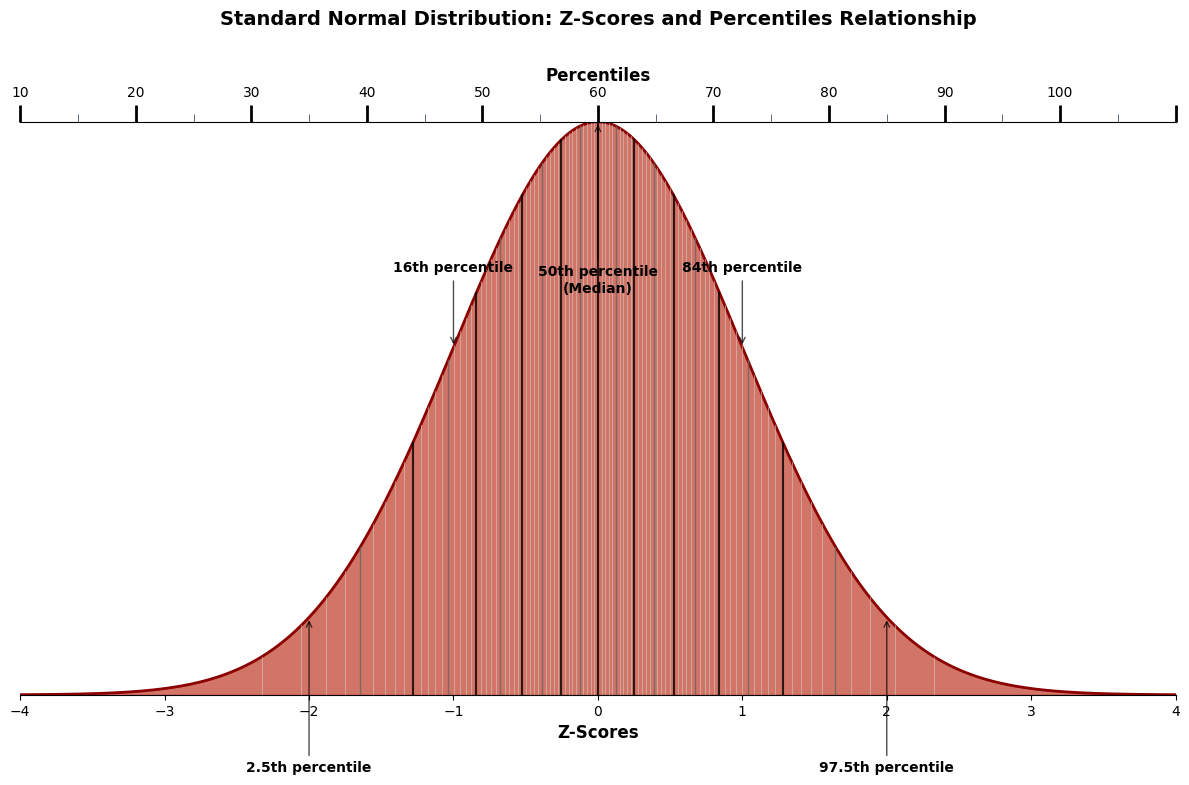

In [7]:
# Create the main visualization with enhanced features
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.margins(y=0)

# Remove the y-axis lines for cleaner appearance
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)

# Plot and fill the Gaussian curve
ax1.fill_between(z_scores, pdf, color="#C03B26", alpha=0.7, label="Standard Normal Distribution")
ax1.plot(z_scores, pdf, color="#8B0000", linewidth=2)

# Label the X-axis (z-scores)
ax1.set_xlabel("Z-Scores", fontsize=12, fontweight='bold')
ax1.set_xlim(-4, 4)

# Remove Y-axis but add a subtle title
ax1.get_yaxis().set_visible(False)
ax1.set_title("Standard Normal Distribution: Z-Scores and Percentiles Relationship", 
              fontsize=14, fontweight='bold', pad=30)

# Create a new X-axis at the top for percentiles
ax2 = ax1.twiny()
ax2.spines["left"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["bottom"].set_visible(False)

# Define percentiles and their positions
percentiles_for_axis = np.linspace(0, 100, 101)
ax2.set_xticks(np.linspace(0, 100, 101))
ax2.xaxis.set_major_locator(MultipleLocator(10))
ax2.xaxis.set_minor_locator(MultipleLocator(5))
ax2.tick_params(which="major", length=12, width=2)
ax2.tick_params(which="minor", length=6, color="#44546A")

# Set labels for every tenth percentile
ax2.set_xticklabels([
    f"{int(p)}" if int(p) % 10 == 0 else "" for p in percentiles_for_axis[::10]
])

ax2.set_xlabel("Percentiles", fontsize=12, fontweight='bold')
ax2.set_xlim(0, 100)

# Calculate z-scores for each percentile
percentiles = np.linspace(0.01, 0.99, 99)  # Avoid 0 and 1 for better visualization
z_percentiles = stats.norm.ppf(percentiles)

# Draw connection lines
normalized_z = np.linspace(-4, 4, 99)
for index, z in enumerate(z_percentiles):
    # Define line properties based on importance
    if (index + 1) % 10 == 0:  # Every 10th percentile
        line_color = "#000000"
        line_thickness = 1.5
    elif (index + 1) % 5 == 0:  # Every 5th percentile
        line_color = "#666666"
        line_thickness = 1.0
    else:
        line_color = "#CCCCCC"
        line_thickness = 0.5
    
    # Height of the curve at this z-score
    pdf_value = stats.norm.pdf(z, 0, 1)
    
    # Draw vertical line from x-axis to curve
    ax1.plot([z, z], [0, pdf_value], color=line_color, linewidth=line_thickness, alpha=0.8)

# Add some key annotations
key_annotations = [
    (-2, "2.5th percentile", "bottom"),
    (-1, "16th percentile", "top"),
    (0, "50th percentile\n(Median)", "bottom"),
    (1, "84th percentile", "top"),
    (2, "97.5th percentile", "bottom")
]

for z, label, position in key_annotations:
    percentile = stats.norm.cdf(z) * 100
    y_pos = stats.norm.pdf(z) + (0.05 if position == "top" else -0.1)
    ax1.annotate(label, xy=(z, stats.norm.pdf(z)), xytext=(z, y_pos),
                ha='center', va='bottom' if position == "top" else 'top',
                fontsize=10, fontweight='bold',
                arrowprops=dict(arrowstyle='->', color='black', alpha=0.7))

plt.tight_layout()
plt.show()

## Step 3: Interactive Z-Score and Percentile Calculator

Let's create functions to convert between z-scores and percentiles, and demonstrate with practical examples.

In [8]:
def z_to_percentile(z_score):
    """Convert z-score to percentile."""
    return stats.norm.cdf(z_score) * 100

def percentile_to_z(percentile):
    """Convert percentile to z-score."""
    return stats.norm.ppf(percentile / 100)

def interpret_z_score(z_score):
    """Provide interpretation of z-score magnitude."""
    abs_z = abs(z_score)
    if abs_z < 1:
        return "Within 1 standard deviation (common)"
    elif abs_z < 2:
        return "Between 1-2 standard deviations (somewhat unusual)"
    elif abs_z < 3:
        return "Between 2-3 standard deviations (unusual)"
    else:
        return "Beyond 3 standard deviations (very unusual/outlier)"

print("Z-SCORE AND PERCENTILE CONVERSION EXAMPLES")
print("=" * 50)

# Example conversions
example_z_scores = [-2.5, -1.96, -1, 0, 1, 1.96, 2.5]
print("\nZ-Score → Percentile Conversions:")
print("-" * 35)
for z in example_z_scores:
    percentile = z_to_percentile(z)
    interpretation = interpret_z_score(z)
    print(f"Z = {z:5.2f} → {percentile:6.2f}th percentile ({interpretation})")

print("\nPercentile → Z-Score Conversions:")
print("-" * 35)
example_percentiles = [1, 5, 10, 25, 50, 75, 90, 95, 99]
for p in example_percentiles:
    z = percentile_to_z(p)
    interpretation = interpret_z_score(z)
    print(f"{p:2.0f}th percentile → Z = {z:6.2f} ({interpretation})")

# Create a comprehensive lookup table
print("\nCOMPREHENSIVE LOOKUP TABLE")
print("-" * 50)
lookup_data = {
    'Percentile': [1, 5, 10, 16, 25, 50, 75, 84, 90, 95, 99],
    'Z-Score': [percentile_to_z(p) for p in [1, 5, 10, 16, 25, 50, 75, 84, 90, 95, 99]],
    'Description': ['1st percentile (very low)', '5th percentile (low)', '10th percentile', 
                   '16th percentile (-1σ)', '1st quartile (Q1)', 'Median (Q2)', 
                   '3rd quartile (Q3)', '84th percentile (+1σ)', '90th percentile',
                   '95th percentile (high)', '99th percentile (very high)']
}

lookup_df = pd.DataFrame(lookup_data)
lookup_df['Z-Score'] = lookup_df['Z-Score'].round(3)
print(lookup_df.to_string(index=False))

Z-SCORE AND PERCENTILE CONVERSION EXAMPLES

Z-Score → Percentile Conversions:
-----------------------------------
Z = -2.50 →   0.62th percentile (Between 2-3 standard deviations (unusual))
Z = -1.96 →   2.50th percentile (Between 1-2 standard deviations (somewhat unusual))
Z = -1.00 →  15.87th percentile (Between 1-2 standard deviations (somewhat unusual))
Z =  0.00 →  50.00th percentile (Within 1 standard deviation (common))
Z =  1.00 →  84.13th percentile (Between 1-2 standard deviations (somewhat unusual))
Z =  1.96 →  97.50th percentile (Between 1-2 standard deviations (somewhat unusual))
Z =  2.50 →  99.38th percentile (Between 2-3 standard deviations (unusual))

Percentile → Z-Score Conversions:
-----------------------------------
 1th percentile → Z =  -2.33 (Between 2-3 standard deviations (unusual))
 5th percentile → Z =  -1.64 (Between 1-2 standard deviations (somewhat unusual))
10th percentile → Z =  -1.28 (Between 1-2 standard deviations (somewhat unusual))
25th percentile

## Step 4: Practical Applications with Real-World Examples

Let's explore how z-scores and percentiles are used in real-world scenarios.

In [9]:
# Real-world application examples
print("REAL-WORLD APPLICATIONS")
print("=" * 50)

# Example 1: SAT Scores (approximately normal with mean=1500, std=300)
print("\n1. SAT SCORE ANALYSIS")
print("-" * 25)
sat_mean, sat_std = 1500, 300
example_sat_scores = [1200, 1350, 1500, 1650, 1800, 2100]

print("SAT Score Analysis (Mean=1500, SD=300):")
for score in example_sat_scores:
    z_score = (score - sat_mean) / sat_std
    percentile = z_to_percentile(z_score)
    interpretation = interpret_z_score(z_score)
    print(f"Score: {score:4d} → Z = {z_score:5.2f} → {percentile:5.1f}th percentile ({interpretation})")

# Example 2: Height distribution (approximately normal)
print("\n2. HEIGHT ANALYSIS")
print("-" * 20)
# Average adult height: 170cm (mean), 10cm (std)
height_mean, height_std = 170, 10
example_heights = [150, 160, 170, 180, 190, 200]

print("Height Analysis (Mean=170cm, SD=10cm):")
for height in example_heights:
    z_score = (height - height_mean) / height_std
    percentile = z_to_percentile(z_score)
    interpretation = interpret_z_score(z_score)
    print(f"Height: {height:3d}cm → Z = {z_score:5.2f} → {percentile:5.1f}th percentile ({interpretation})")

# Example 3: Quality Control in Manufacturing
print("\n3. QUALITY CONTROL EXAMPLE")
print("-" * 30)
# Product weight: 500g target, 5g standard deviation
target_weight, weight_std = 500, 5
example_weights = [485, 490, 495, 500, 505, 510, 515]

print("Product Weight Analysis (Target=500g, SD=5g):")
for weight in example_weights:
    z_score = (weight - target_weight) / weight_std
    percentile = z_to_percentile(z_score)
    
    # Quality control decision
    if abs(z_score) > 2:
        decision = "REJECT (outside 2σ limit)"
    elif abs(z_score) > 1:
        decision = "INVESTIGATE (outside 1σ limit)"
    else:
        decision = "ACCEPT (within 1σ limit)"
    
    print(f"Weight: {weight:3d}g → Z = {z_score:5.2f} → {percentile:5.1f}th percentile → {decision}")

REAL-WORLD APPLICATIONS

1. SAT SCORE ANALYSIS
-------------------------
SAT Score Analysis (Mean=1500, SD=300):
Score: 1200 → Z = -1.00 →  15.9th percentile (Between 1-2 standard deviations (somewhat unusual))
Score: 1350 → Z = -0.50 →  30.9th percentile (Within 1 standard deviation (common))
Score: 1500 → Z =  0.00 →  50.0th percentile (Within 1 standard deviation (common))
Score: 1650 → Z =  0.50 →  69.1th percentile (Within 1 standard deviation (common))
Score: 1800 → Z =  1.00 →  84.1th percentile (Between 1-2 standard deviations (somewhat unusual))
Score: 2100 → Z =  2.00 →  97.7th percentile (Between 2-3 standard deviations (unusual))

2. HEIGHT ANALYSIS
--------------------
Height Analysis (Mean=170cm, SD=10cm):
Height: 150cm → Z = -2.00 →   2.3th percentile (Between 2-3 standard deviations (unusual))
Height: 160cm → Z = -1.00 →  15.9th percentile (Between 1-2 standard deviations (somewhat unusual))
Height: 170cm → Z =  0.00 →  50.0th percentile (Within 1 standard deviation (co

## Step 5: Visualizing Different Scenarios

Let's create visualizations for our real-world examples to better understand the concepts.

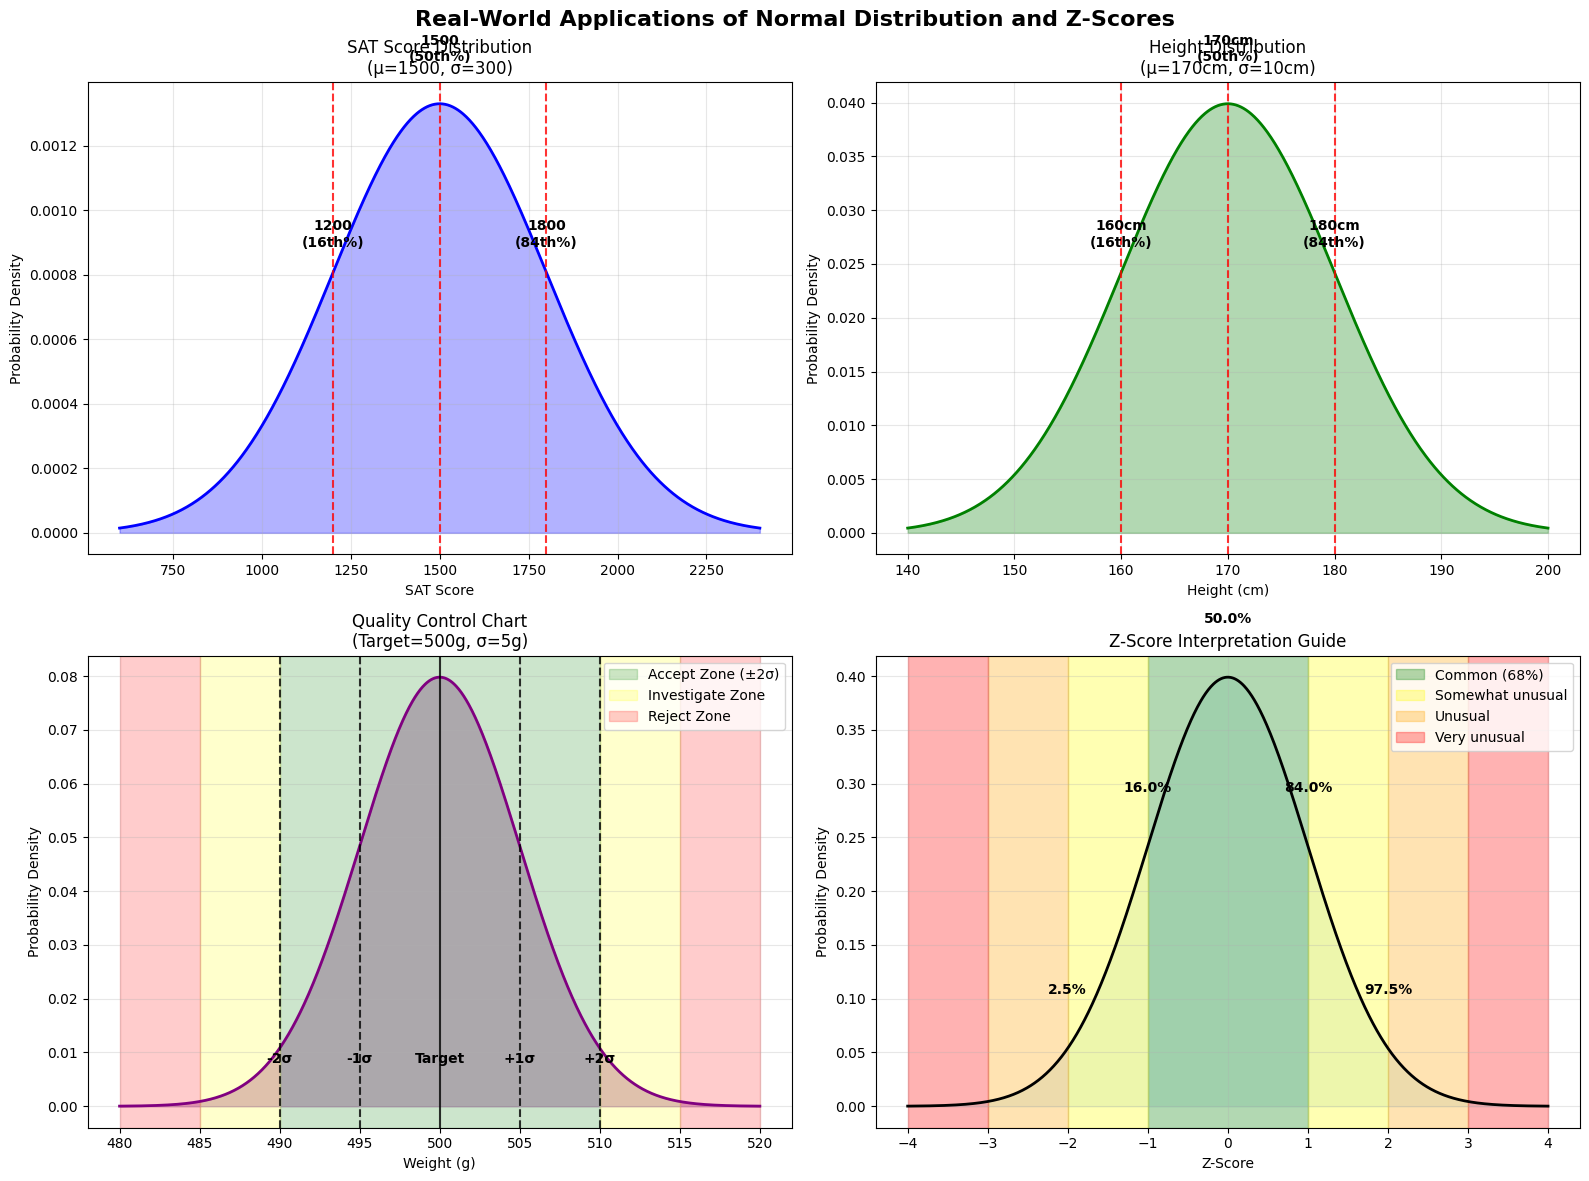

In [10]:
# Create visualizations for real-world examples
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Real-World Applications of Normal Distribution and Z-Scores', 
             fontsize=16, fontweight='bold')

# SAT Scores visualization
x_sat = np.linspace(600, 2400, 1000)
y_sat = stats.norm.pdf(x_sat, sat_mean, sat_std)

axes[0,0].plot(x_sat, y_sat, 'b-', linewidth=2, label='SAT Score Distribution')
axes[0,0].fill_between(x_sat, y_sat, alpha=0.3, color='blue')

# Mark key SAT scores
for score in [1200, 1500, 1800]:
    z = (score - sat_mean) / sat_std
    percentile = z_to_percentile(z)
    axes[0,0].axvline(score, color='red', linestyle='--', alpha=0.8)
    axes[0,0].text(score, stats.norm.pdf(score, sat_mean, sat_std) * 1.1, 
                   f'{score}\n({percentile:.0f}th%)', ha='center', fontsize=10, fontweight='bold')

axes[0,0].set_title('SAT Score Distribution\n(μ=1500, σ=300)')
axes[0,0].set_xlabel('SAT Score')
axes[0,0].set_ylabel('Probability Density')
axes[0,0].grid(True, alpha=0.3)

# Height distribution visualization
x_height = np.linspace(140, 200, 1000)
y_height = stats.norm.pdf(x_height, height_mean, height_std)

axes[0,1].plot(x_height, y_height, 'g-', linewidth=2, label='Height Distribution')
axes[0,1].fill_between(x_height, y_height, alpha=0.3, color='green')

# Mark key heights
for height in [160, 170, 180]:
    z = (height - height_mean) / height_std
    percentile = z_to_percentile(z)
    axes[0,1].axvline(height, color='red', linestyle='--', alpha=0.8)
    axes[0,1].text(height, stats.norm.pdf(height, height_mean, height_std) * 1.1,
                   f'{height}cm\n({percentile:.0f}th%)', ha='center', fontsize=10, fontweight='bold')

axes[0,1].set_title('Height Distribution\n(μ=170cm, σ=10cm)')
axes[0,1].set_xlabel('Height (cm)')
axes[0,1].set_ylabel('Probability Density')
axes[0,1].grid(True, alpha=0.3)

# Quality control visualization
x_weight = np.linspace(480, 520, 1000)
y_weight = stats.norm.pdf(x_weight, target_weight, weight_std)

axes[1,0].plot(x_weight, y_weight, 'purple', linewidth=2)
axes[1,0].fill_between(x_weight, y_weight, alpha=0.3, color='purple')

# Quality control zones
axes[1,0].axvspan(490, 510, alpha=0.2, color='green', label='Accept Zone (±2σ)')
axes[1,0].axvspan(485, 490, alpha=0.2, color='yellow', label='Investigate Zone')
axes[1,0].axvspan(510, 515, alpha=0.2, color='yellow')
axes[1,0].axvspan(480, 485, alpha=0.2, color='red', label='Reject Zone')
axes[1,0].axvspan(515, 520, alpha=0.2, color='red')

# Mark control limits
for limit, label in [(490, '-2σ'), (495, '-1σ'), (500, 'Target'), (505, '+1σ'), (510, '+2σ')]:
    axes[1,0].axvline(limit, color='black', linestyle='-' if limit == 500 else '--', alpha=0.8)
    axes[1,0].text(limit, max(y_weight) * 0.1, label, ha='center', fontweight='bold')

axes[1,0].set_title('Quality Control Chart\n(Target=500g, σ=5g)')
axes[1,0].set_xlabel('Weight (g)')
axes[1,0].set_ylabel('Probability Density')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Z-score interpretation guide
z_range = np.linspace(-4, 4, 1000)
y_standard = stats.norm.pdf(z_range, 0, 1)

axes[1,1].plot(z_range, y_standard, 'black', linewidth=2)
axes[1,1].fill_between(z_range, y_standard, alpha=0.3, color='lightblue')

# Color-code different regions
axes[1,1].axvspan(-1, 1, alpha=0.3, color='green', label='Common (68%)')
axes[1,1].axvspan(-2, -1, alpha=0.3, color='yellow', label='Somewhat unusual')
axes[1,1].axvspan(1, 2, alpha=0.3, color='yellow')
axes[1,1].axvspan(-3, -2, alpha=0.3, color='orange', label='Unusual')
axes[1,1].axvspan(2, 3, alpha=0.3, color='orange')
axes[1,1].axvspan(-4, -3, alpha=0.3, color='red', label='Very unusual')
axes[1,1].axvspan(3, 4, alpha=0.3, color='red')

# Add percentile labels
for z, percentile in [(-2, 2.5), (-1, 16), (0, 50), (1, 84), (2, 97.5)]:
    axes[1,1].text(z, stats.norm.pdf(z) + 0.05, f'{percentile:.1f}%', 
                   ha='center', fontweight='bold', fontsize=10)

axes[1,1].set_title('Z-Score Interpretation Guide')
axes[1,1].set_xlabel('Z-Score')
axes[1,1].set_ylabel('Probability Density')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Step 6: Advanced Applications and Statistical Tests

Understanding z-scores enables more advanced statistical applications.

In [11]:
# Advanced applications
print("ADVANCED APPLICATIONS")
print("=" * 40)

# 1. Outlier detection using z-scores
print("\n1. OUTLIER DETECTION")
print("-" * 25)

# Generate sample data with outliers
np.random.seed(42)
normal_data = np.random.normal(100, 15, 200)
outliers = [140, 45, 155]  # Add some outliers
complete_data = np.concatenate([normal_data, outliers])

# Calculate z-scores for all data points
data_mean = np.mean(complete_data)
data_std = np.std(complete_data)
z_scores_data = (complete_data - data_mean) / data_std

# Identify outliers (|z| > 2 or |z| > 3)
outliers_2sigma = complete_data[np.abs(z_scores_data) > 2]
outliers_3sigma = complete_data[np.abs(z_scores_data) > 3]

print(f"Dataset statistics: Mean = {data_mean:.2f}, SD = {data_std:.2f}")
print(f"Total data points: {len(complete_data)}")
print(f"Outliers (|Z| > 2): {len(outliers_2sigma)} values: {outliers_2sigma}")
print(f"Outliers (|Z| > 3): {len(outliers_3sigma)} values: {outliers_3sigma}")

# 2. Confidence intervals using z-scores
print("\n2. CONFIDENCE INTERVALS")
print("-" * 30)

# Common confidence levels and their z-scores
confidence_levels = [90, 95, 99]
for conf_level in confidence_levels:
    alpha = (100 - conf_level) / 100
    z_critical = stats.norm.ppf(1 - alpha/2)
    print(f"{conf_level}% Confidence Level → Z = ±{z_critical:.3f}")

# Example: 95% confidence interval for a sample mean
sample_mean = 100
sample_std = 15
sample_size = 30
standard_error = sample_std / np.sqrt(sample_size)
z_95 = 1.96

margin_of_error = z_95 * standard_error
ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

print(f"\nExample: 95% CI for sample mean")
print(f"Sample mean: {sample_mean}, Sample SD: {sample_std}, n: {sample_size}")
print(f"Standard Error: {standard_error:.3f}")
print(f"Margin of Error: {margin_of_error:.3f}")
print(f"95% CI: [{ci_lower:.2f}, {ci_upper:.2f}]")

# 3. Standardizing different datasets for comparison
print("\n3. DATA STANDARDIZATION FOR COMPARISON")
print("-" * 45)

# Example: Comparing test scores from different exams
exam1_scores = [78, 82, 85, 90, 95]  # Mean ≈ 86, SD ≈ 6.5
exam2_scores = [650, 720, 750, 800, 850]  # Mean ≈ 754, SD ≈ 75

exam1_mean, exam1_std = np.mean(exam1_scores), np.std(exam1_scores, ddof=1)
exam2_mean, exam2_std = np.mean(exam2_scores), np.std(exam2_scores, ddof=1)

print("Original Scores:")
print(f"Exam 1 (0-100 scale): {exam1_scores} (μ={exam1_mean:.1f}, σ={exam1_std:.1f})")
print(f"Exam 2 (0-1000 scale): {exam2_scores} (μ={exam2_mean:.0f}, σ={exam2_std:.0f})")

print("\nStandardized Z-Scores (comparable across exams):")
exam1_z = [(score - exam1_mean) / exam1_std for score in exam1_scores]
exam2_z = [(score - exam2_mean) / exam2_std for score in exam2_scores]

print(f"Exam 1 Z-scores: {[f'{z:.2f}' for z in exam1_z]}")
print(f"Exam 2 Z-scores: {[f'{z:.2f}' for z in exam2_z]}")

print("\nNow the scores are directly comparable!")
print("A z-score of +1.0 means 'one standard deviation above average' on both exams")

ADVANCED APPLICATIONS

1. OUTLIER DETECTION
-------------------------
Dataset statistics: Mean = 99.59, SD = 15.14
Total data points: 203
Outliers (|Z| > 2): 7 values: [ 60.70382344 136.94863169 132.85683439 140.8025375  140.
  45.         155.        ]
Outliers (|Z| > 3): 2 values: [ 45. 155.]

2. CONFIDENCE INTERVALS
------------------------------
90% Confidence Level → Z = ±1.645
95% Confidence Level → Z = ±1.960
99% Confidence Level → Z = ±2.576

Example: 95% CI for sample mean
Sample mean: 100, Sample SD: 15, n: 30
Standard Error: 2.739
Margin of Error: 5.368
95% CI: [94.63, 105.37]

3. DATA STANDARDIZATION FOR COMPARISON
---------------------------------------------
Original Scores:
Exam 1 (0-100 scale): [78, 82, 85, 90, 95] (μ=86.0, σ=6.7)
Exam 2 (0-1000 scale): [650, 720, 750, 800, 850] (μ=754, σ=76)

Standardized Z-Scores (comparable across exams):
Exam 1 Z-scores: ['-1.20', '-0.60', '-0.15', '0.60', '1.35']
Exam 2 Z-scores: ['-1.36', '-0.45', '-0.05', '0.60', '1.26']

Now the

## Step 7: Interactive Z-Score Calculator and Summary

Let's create a practical summary and provide tools for working with z-scores and percentiles.

In [12]:
# Create a comprehensive summary table
print("COMPREHENSIVE REFERENCE GUIDE")
print("=" * 50)

# Create detailed reference table
reference_data = {
    'Z-Score': [-3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0],
    'Percentile': [],
    'Interpretation': [],
    'Probability_Below': [],
    'Probability_Above': []
}

interpretations = {
    -3.0: "Extremely low", -2.5: "Very low", -2.0: "Low", -1.5: "Below average",
    -1.0: "Somewhat below average", -0.5: "Slightly below average", 0.0: "Average",
    0.5: "Slightly above average", 1.0: "Somewhat above average", 1.5: "Above average",
    2.0: "High", 2.5: "Very high", 3.0: "Extremely high"
}

for z in reference_data['Z-Score']:
    percentile = stats.norm.cdf(z) * 100
    prob_below = stats.norm.cdf(z)
    prob_above = 1 - prob_below
    
    reference_data['Percentile'].append(f"{percentile:.2f}%")
    reference_data['Interpretation'].append(interpretations[z])
    reference_data['Probability_Below'].append(f"{prob_below:.4f}")
    reference_data['Probability_Above'].append(f"{prob_above:.4f}")

reference_df = pd.DataFrame(reference_data)
print(reference_df.to_string(index=False))

# Practical formulas and key facts
print(f"\n\nKEY FORMULAS AND FACTS")
print("=" * 30)
print("""
Z-Score Formula:
    Z = (X - μ) / σ
    Where: X = observed value, μ = mean, σ = standard deviation

Converting Z-score to Raw Score:
    X = μ + (Z × σ)

Percentile to Z-Score:
    Z = Φ⁻¹(P/100)
    Where: Φ⁻¹ = inverse normal CDF, P = percentile

Z-Score to Percentile:
    P = Φ(Z) × 100
    Where: Φ = normal CDF

Key Percentiles:
    • 50th percentile (median) = Z = 0.00
    • 84th percentile = Z = 1.00 (1 SD above mean)
    • 97.5th percentile = Z = 1.96 (critical value for 95% CI)
    • 99.5th percentile = Z = 2.58 (critical value for 99% CI)

68-95-99.7 Rule:
    • 68% of data within ±1 standard deviation
    • 95% of data within ±2 standard deviations  
    • 99.7% of data within ±3 standard deviations
""")

print("\nPRACTICAL APPLICATIONS SUMMARY")
print("=" * 40)
print("""
1. STANDARDIZATION: Compare scores from different scales
2. OUTLIER DETECTION: Identify unusual values (|Z| > 2 or 3)
3. PROBABILITY: Calculate likelihood of observations
4. QUALITY CONTROL: Monitor processes and set control limits
5. HYPOTHESIS TESTING: Determine statistical significance
6. CONFIDENCE INTERVALS: Estimate population parameters
7. PERCENTILE RANKS: Understand relative position in distribution
8. NORMALIZATION: Prepare data for machine learning algorithms
""")

COMPREHENSIVE REFERENCE GUIDE
 Z-Score Percentile         Interpretation Probability_Below Probability_Above
    -3.0      0.13%          Extremely low            0.0013            0.9987
    -2.5      0.62%               Very low            0.0062            0.9938
    -2.0      2.28%                    Low            0.0228            0.9772
    -1.5      6.68%          Below average            0.0668            0.9332
    -1.0     15.87% Somewhat below average            0.1587            0.8413
    -0.5     30.85% Slightly below average            0.3085            0.6915
     0.0     50.00%                Average            0.5000            0.5000
     0.5     69.15% Slightly above average            0.6915            0.3085
     1.0     84.13% Somewhat above average            0.8413            0.1587
     1.5     93.32%          Above average            0.9332            0.0668
     2.0     97.72%                   High            0.9772            0.0228
     2.5     99.38%   

## Key Takeaways and Best Practices

### Understanding Z-Scores and Percentiles
1. **Z-scores standardize data** to a common scale (mean=0, SD=1)
2. **Percentiles show relative position** within a distribution
3. **Normal distribution properties** enable precise probability calculations
4. **The 68-95-99.7 rule** provides quick interpretation guidelines

### Practical Applications
- **Data Analysis**: Standardize variables for comparison and modeling
- **Quality Control**: Set control limits and identify process variations
- **Education**: Convert test scores to comparable percentile ranks
- **Healthcare**: Interpret medical measurements relative to population norms
- **Business**: Identify outliers in sales, customer behavior, or performance metrics

### Best Practices
1. **Verify normality** before applying normal distribution methods
2. **Use appropriate z-score thresholds** for outlier detection (typically ±2 or ±3)
3. **Consider sample size** when interpreting z-scores and percentiles
4. **Provide context** when communicating percentile rankings
5. **Combine with visualization** for better understanding

### Common Pitfalls to Avoid
- Assuming all data follows normal distribution
- Using z-scores with small sample sizes without caution
- Forgetting that percentiles are relative to the specific dataset
- Over-interpreting small differences in percentile ranks
- Ignoring the practical significance of statistical measures

Understanding these concepts provides a strong foundation for statistical analysis and data-driven decision making.